# Gutenberg Full Dataset (End Windows) with CNN-Kim
CNN-Kim analysis with the Gutenberg Full dataset using the end windows. Using the following configuration:
1. Using Learned Embedding
1. Embedding size: 100
1. Using document length of 5,000
1. Top vocabulary count 5,000
1. Using filter sizes of 3, 4, 5, 6
1. Adam Learning Rate of 1e-4
1. L2-contraint 0.001

In [1]:
%matplotlib inline

import os
import sys
ai_lit_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir))
print("Loading AI Lit system from path", ai_lit_path)
sys.path.append(ai_lit_path)

import numpy as np
import tensorflow as tf

from ai_lit.analysis import analysis_util
from ai_lit.university.gutenberg import gb_full_cnn_kim
from ai_lit.university.gutenberg.gb_full_cnn_kim import TextWindow

Loading AI Lit system from path C:\Users\joewo\workspaces\python\ai_lit


C:\Tools\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Found 1 runs. Looking for one with a matching TensorFlow configuration.
Run 20180114-081716 is the latest run with a matching configuration. Selecting this one.
Accuracy: 0.561701923077
F1: 0.424246403551


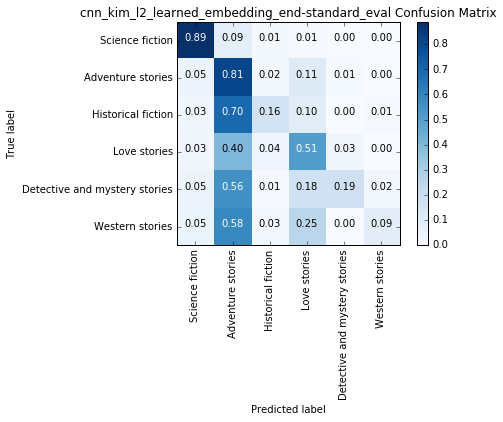

In [3]:
# use the flags imported from the univserity and the model to set the configuration
tf.flags.FLAGS.document_length = 5000
tf.flags.FLAGS.vocab_count = 5000
tf.flags.FLAGS.embedding_size=100

dataset_wkspc = os.path.join(ai_lit_path, 'workspace', 'gb_input')
training_wkspc = os.path.join(ai_lit_path, 'workspace', 'gutenberg_full')
model_name = 'cnn_kim_l2_learned_embedding_end'
evaluation_name = 'standard_eval'
univ = gb_full_cnn_kim.GbFullCnnKimUniversity(model_name, training_wkspc, dataset_wkspc, text_window=TextWindow.end)
accuracy, f1, cm = analysis_util.train_and_evaluate(univ, model_name, evaluation_name)